# Installation

To install, download the mbs module from PyPI via 'pip install mbs' (available soon). Alternatively, you can also try 'pip install git+https://github.com/mueslo/mbs.git'

# Usage

In [1]:
import mbs

For explicit plotting, we will also import the matplotlib module

In [15]:
import matplotlib.pyplot as plt

## Loading and data access
To load a single Spectrum given a filename (works for both krx and txt files):

In [6]:
spec = mbs.Spectrum.from_filename("Z:\\A1#7\\DATA\\20190423\\190423-MBS-00232_00043.txt")

If use jupyter, you can get widget of the spectrum by just having the last output of the cell be the spectrum (or running 'display(\<s\>)', where \<s\> is your Spectrum object). This works both for the standard inline matplotlib backend, as well as for the interactive ipympl backend for full interactivity.

<i>work in progress, cannot be viewed on github</i>

In [5]:
spec

There are also explicit plotting functions available, these require a matplotlib axes to be passed currently for plotting on

You can pass any typical argument here that you would also pass to matplotlib's imshow/pcolormesh functions.

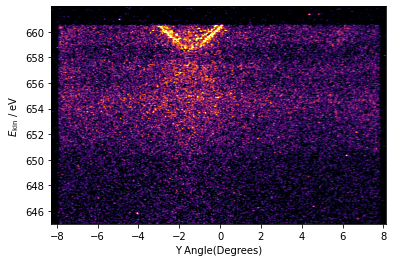

In [19]:
fig, ax = plt.subplots()
spec.plot(ax=ax, cmap='inferno')

Similarly, the angle can be transformed to parallel momentum by using the plot_k method instead.

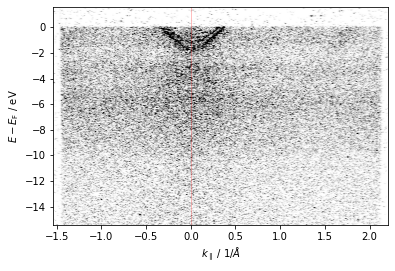

In [28]:
fig, ax = plt.subplots()
spec.plot_k(ax=ax, k_origin=-0.35, Ef=660.4, V0=8, cmap='gist_yarg')
ax.axvline(0, color='r', alpha=0.5, lw=0.5)

The MBS header can be found in the metadata attribute of the spectrum, while the spectrum itself is found in the 'data' attribute of the Spectrum

In [7]:
spec.metadata

OrderedDict([('Frames Per Step', 600),
             ('No. Steps', 850),
             ('Pass Energy', 'PE200'),
             ('Lens Mode', 'L4Ang1d6'),
             ('No Scans', 0),
             ('RegNo', 43),
             ('TotSteps', 1645),
             ('AddFMS', 6),
             ('ActScans', 2),
             ('DithSteps', 0),
             ('Start K.E.', 645.0),
             ('Step Size', 0.02),
             ('End K.E.', 662.0),
             ('SpinOffs', 0.0),
             ('Width', 17.0),
             ('Center K.E.', 653.5),
             ('FirstEnergy', 637.1810113),
             ('DeflX', 1.4),
             ('DeflY', 0.0),
             ('Dbl10', 0.0),
             ('AcqMode', 'Swept'),
             ('Number Name', True),
             ('Local Detector', False),
             ('XTAB ON', True),
             ('Spin', False),
             ('SX', 170),
             ('EX', 1110),
             ('SY', 129),
             ('NoS', 762),
             ('EndY', 890),
             ('Discr', 4),
  

In [8]:
spec.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

## Data manipulation

There are slicing operators available also, which use the energy and lens axis respectively so to for example select only the subspectrum from 656 to 661eV and -4 to +1 deg:

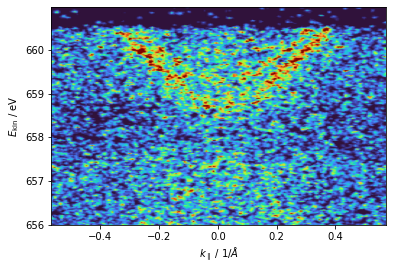

In [22]:
fig, ax = plt.subplots()

spec[656:661, -4:1].plot_k(ax, k_origin=-0.35, cmap='turbo')

If you have a series of identical spectra you wish to sum up for better statistics, you can also directly add spectra.

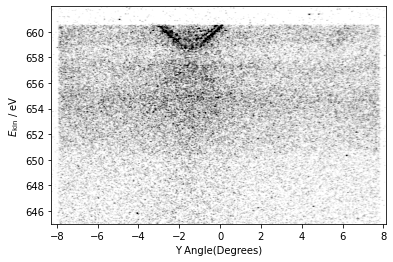

In [29]:
# let's assume these are different spectra

spec2 = spec
spec3 = spec

fig, ax = plt.subplots()
(spec + spec2 + spec3).plot(ax)

The "edc" attribute of a spectrum gives you the spectrum summed along the lens axis, so to for example get the EDC of a certain angle range, you could do the following:

*Note*: at some future point .edc will return a one-dimensional Spectrum object instead

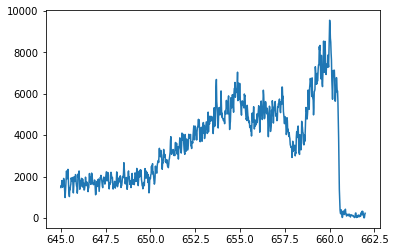

In [31]:
plt.figure()

plt.plot(spec.energy_scale, spec[:, -4:1].edc)